<a href="https://colab.research.google.com/github/aslikorkmaz48/NLP-Portfolio-T-rk-e/blob/main/Spam_Dedektoru_ve_Hata_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Güvenlik taraması yapılıyor...


Görüntülenen çıkış son 5000 satıra kısaltıldı.


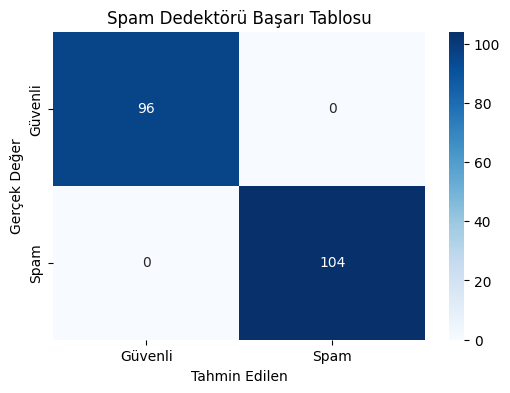

Mesaj: Tebrikler, iphone kazandınız! Linke tıklayın.
Sonuç: ⚠️ DİKKAT: SPAM/DOLANDIRICILIK!

Mesaj: Toplantı notlarını ekte bulabilirsiniz.
Sonuç: ✅ GÜVENLİ MESAJ



In [11]:
# --- 1. ADIM: KÜTÜPHANELER ---
import pandas as pd
import random
from zeyrek import MorphAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier # Bu sefer farklı bir model!
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('punkt_tab') # Hatayı çözen sihirli satır
nltk.download('stopwords') # Bunu da ekleyelim, lazım olacak
# --- 2. ADIM: VERİ SETİ (Gerçekçi Spam Senaryosu) ---
# Şirketlerin en büyük derdi: Sahte kampanyalar ve gerçek mesajlar
guvenli_mesajlar = [
    "Sayın müşterimiz, siparişiniz kargoya verilmiştir.",
    "Yarınki toplantı saat 14:00'te başlayacaktır.",
    "Şifrenizi kimseyle paylaşmamanızı rica ederiz.",
    "Hesap özetiniz e-posta adresinize gönderildi.",
    "Kütüphaneden aldığınız kitabın süresi dolmak üzere."
]

spam_mesajlar = [
    "TEBRİKLER! İnanılmaz ödül kazandınız, hemen tıklayın!",
    "Bedava kredi kartı borç kapatma fırsatı burada.",
    "HESABINIZ BLOKE OLDU! Bilgilerinizi güncellemek için linke girin.",
    "Günde 5000 TL kazanmak ister misiniz? Hemen ara.",
    "Ücretsiz tatil kazandınız, bu fırsatı kaçırmayın!!!"
]

data = {
    'mesaj': guvenli_mesajlar * 100 + spam_mesajlar * 100,
    'etiket': [0] * 500 + [1] * 500  # 0: Güvenli (Ham), 1: Spam
}
df_spam = pd.DataFrame(data)

# --- 3. ADIM: TÜRKÇE ANALİZ (ZEYREK) ---
analyzer = MorphAnalyzer()
def spam_temizle(metin):
    # Zeyrek ile kök bulma
    analiz = analyzer.lemmatize(metin.lower())
    kokler = [item[1][0] for item in analiz if len(item[1][0]) > 2]
    return " ".join(kokler)

print("Güvenlik taraması yapılıyor...")
df_spam['temiz_mesaj'] = df_spam['mesaj'].apply(spam_temizle)

# --- 4. ADIM: MODEL EĞİTİMİ (RANDOM FOREST) ---
# Bu sefer Logistic Regression yerine daha güçlü olan Random Forest kullanıyoruz
X_train, X_test, y_train, y_test = train_test_split(df_spam['temiz_mesaj'], df_spam['etiket'], test_size=0.2)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Random Forest: Birden fazla karar ağacı kullanarak tahmin yapar (Çok güçlüdür!)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_vec, y_train)

# --- 5. ADIM: KARMAŞIKLIK MATRİSİ (Hata Analizi) ---
# İşe alımcılar "Confusion Matrix" bilmene bayılır!
y_pred = model.predict(X_test_vec)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Güvenli', 'Spam'], yticklabels=['Güvenli', 'Spam'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Spam Dedektörü Başarı Tablosu')
plt.show()

# --- 6. ADIM: SİSTEMİ TEST ET ---
def spam_kontrol(yeni_mesaj):
    temiz = spam_temizle(yeni_mesaj)
    vec = vectorizer.transform([temiz])
    tahmin = model.predict(vec)[0]
    sonuc = "⚠️ DİKKAT: SPAM/DOLANDIRICILIK!" if tahmin == 1 else "✅ GÜVENLİ MESAJ"
    print(f"Mesaj: {yeni_mesaj}\nSonuç: {sonuc}\n")

spam_kontrol("Tebrikler, iphone kazandınız! Linke tıklayın.")
spam_kontrol("Toplantı notlarını ekte bulabilirsiniz.")